# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Import the dataset from this [Online_Retail.csv](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Online_Retail/Online_Retail.csv) from the folder.

In [2]:
online_rt = pd.read_csv("Exercise Data Files/Pandas Exercise Online Retail files/Online_Retail.csv", encoding="ISO-8859-1")
online_rt


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


### Step 3. Assign it to a variable called online_rt

In [3]:
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

,Country,Quantity
24,Netherlands,200128
10,EIRE,142637
14,Germany,117448
13,France,110480
0,Australia,83653
32,Sweden,35637
33,Switzerland,30325
31,Spain,26824
20,Japan,25218
3,Belgium,23152


Index(['Country', 'Quantity'], dtype='object')

<BarContainer object of 38 artists>

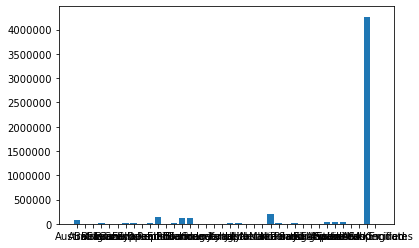

In [94]:
# pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
t = online_rt.groupby('Country')[['Quantity']].sum().reset_index()
display(t.sort_values(by=['Quantity'],ascending = False).loc[t.Country != 'United Kingdom'].iloc[0:10,])
display(t.columns)

import matplotlib.pyplot as plt
plt.bar(x=t['Country'],height=t['Quantity'])# A bar chart


In [85]:
pd.set_option('display.max_rows', None)
t = online_rt.groupby('Country')[['Quantity']].sum().reset_index()
display(t.sort_values(by=['Quantity'],ascending = False).loc[t.Country != 'United Kingdom'].iloc[0:10,])
display(t.columns)

,Country,Quantity
24,Netherlands,200128
10,EIRE,142637
14,Germany,117448
13,France,110480
0,Australia,83653
32,Sweden,35637
33,Switzerland,30325
31,Spain,26824
20,Japan,25218
3,Belgium,23152


Index(['Country', 'Quantity'], dtype='object')

### Step 5.  Exclude negative Quatity entries

In [81]:
online_rt.shape
online_rt[online_rt['Quantity']>=0] #Excluding negative quantity records (if any) for online_rt
display(online_rt.shape)

display(t.shape) #(383058, 2)
t1 = t[t['Quantity']>=0] #Excluding negative quantity records (if any) for t
display(t1.shape)

(541909, 8)

(38, 2)

(38, 2)

### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries

<ipython-input-28-e598d60185c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDF['QuantityPerUnitPrice'] = online_rt['Quantity']/online_rt['UnitPrice']


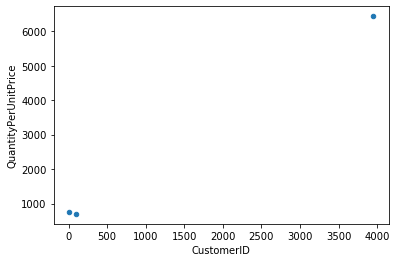

In [28]:
newDF = online_rt[['CustomerID','Country']]
newDF['QuantityPerUnitPrice'] = online_rt['Quantity']/online_rt['UnitPrice']
unique_countries = newDF[['Country','CustomerID','QuantityPerUnitPrice']].groupby('Country').nunique()
unique_countries.sort_values('QuantityPerUnitPrice',ascending = False, inplace=True)
unique_countries = unique_countries.nlargest(3,['QuantityPerUnitPrice'],keep = 'first')
unique_countries.head(3)
unique_countries.plot.scatter('CustomerID','QuantityPerUnitPrice')